In [42]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

test = True

path = '/home/jakob/Project_MayaSim/Python/output_data/X7_eco_income/results/trajectory'
if test:
    path = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X7_eco_income/results/trajectory'

data = pd.read_pickle(path)
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))

def plotlines(data, level, key, unstack):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls)
    lg = ln.get_legend()
    bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
    xOffset = .5
    bb.x0 += xOffset
    bb.x1 += xOffset
    lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)
    
data.head()

Populating the interactive namespace from numpy and matplotlib


/home/jakob/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


key                                                    mean_trajectories  \
r_bca r_eco  kill_cropless timesteps observables                           
0.1   0.0001 False         0         max_AG                   744.436464   
                                     max_ES                   186.586508   
                                     max_bca                 1074.559157   
                                     max_cluster_size           2.500000   
                                     max_npp                 2430.802844   

key                                                    sigma_trajectories  
r_bca r_eco  kill_cropless timesteps observables                           
0.1   0.0001 False         0         max_AG                  0.000000e+00  
                                     max_ES                  4.315837e-07  
                                     max_bca                 0.000000e+00  
                                     max_cluster_size        7.071068e-01  
                                     max_npp                 0.000000e+00

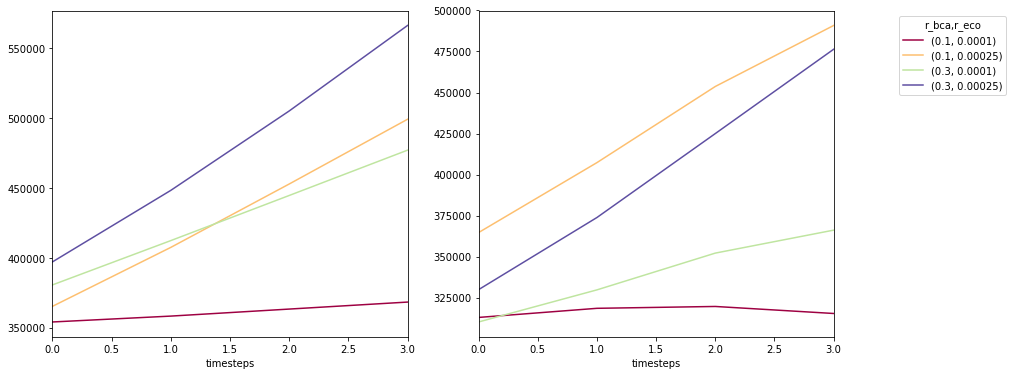

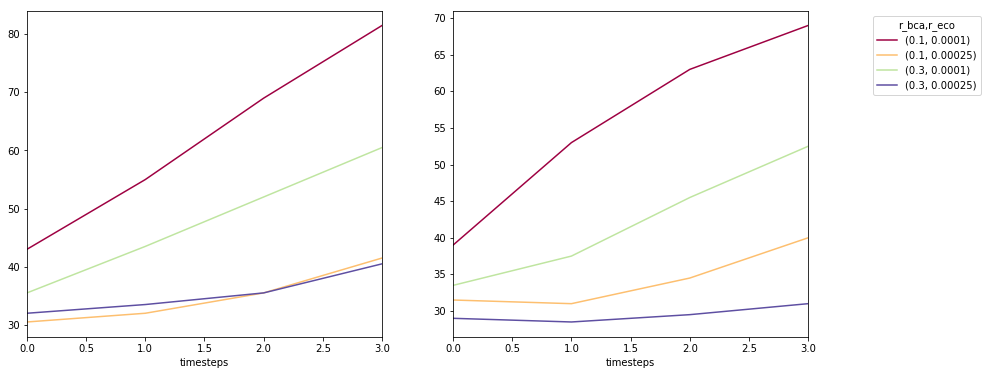

In [43]:
key=[False, 'total_population']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

key=[False, 'total_settlements']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

Killing of cities without crops obviously makes a huge difference. Leaving cities without crops alive leads to significantly less pronounced overshoot and collapse behavior in population and no collapse in number of settlements. Although I wonder, if settlements do propperly die from low population.

The different sources of income are shown below:

Agriculture Income does not differ between the conditions. Ecosysten and trade income do.

It is visible, that for none of the tested parameters the climate variability signature does not show in the trade income, if cities without crops remain alive.

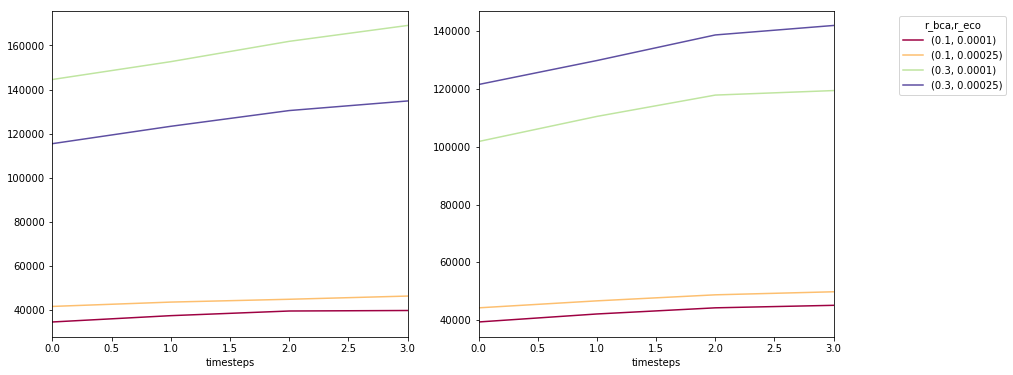

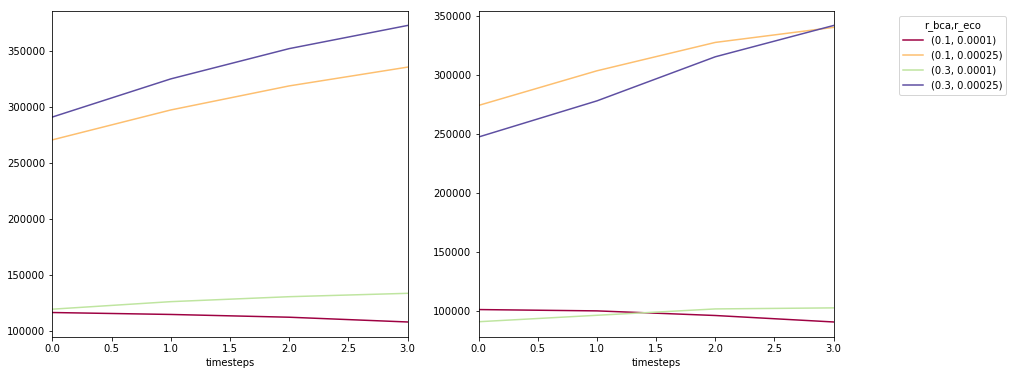

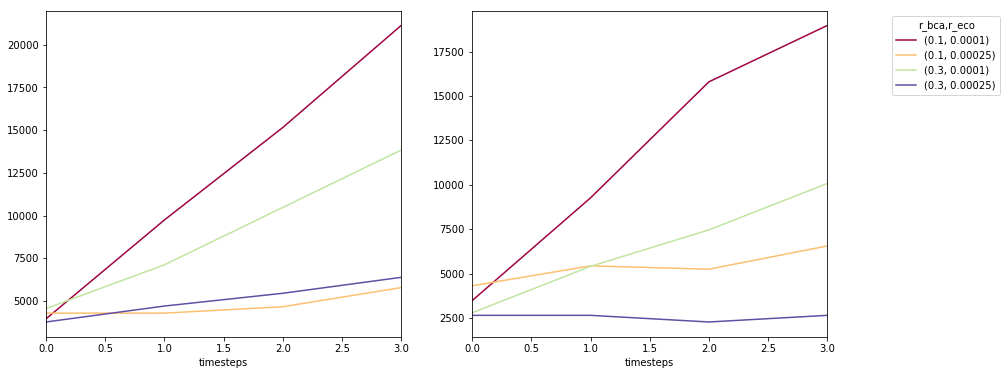

In [44]:
key=[False, 'total_income_agriculture']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

key=[False, 'total_income_ecosystem']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

key=[False, 'total_income_trade']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

All of this leaves me wondering, if trade links are removed propperly, if cities population shrinks.
It looks as if trade links only vanish if settlements die. Check this!

In [45]:
dt = data['mean_trajectories'].unstack('observables')

dt['total_income'] = dt['total_income_trade'] + dt['total_income_agriculture'] + dt['total_income_ecosystem']
dt.head()






observables                               max_AG      max_ES      max_bca  \
r_bca r_eco  kill_cropless timesteps                                        
0.1   0.0001 False         0          744.436464  186.586508  1074.559157   
                           1          744.436464  186.586508  1074.559157   
                           2          744.436464  186.586507  1074.559157   
                           3          734.017202  182.084270  1073.142744   
             True          0          744.436464  186.586508  1074.559157   

observables                           max_cluster_size      max_npp  \
r_bca r_eco  kill_cropless timesteps                                  
0.1   0.0001 False         0                       2.5  2430.802844   
                           1                       2.5  2430.802844   
                           2                       2.5  2430.802844   
                           3                       2.5  2430.802844   
             True          0                       3.0  2430.802844   

observables                           max_pop_grad  max_rain  max_soil_deg  \
r_bca r_eco  kill_cropless timesteps                                         
0.1   0.0001 False         0                  15.0    5319.0           5.0   
                           1                  15.0    5319.0          10.0   
                           2                  15.0    5319.0          15.0   
                           3                  15.0    5319.0          20.0   
             True          0                  15.0    5319.0           5.0   

observables                           max_waterflow  mean_cluster_size  \
r_bca r_eco  kill_cropless timesteps                                     
0.1   0.0001 False         0               4.127050           2.142857   
                           1               4.127050           1.536732   
                           2               4.127050           1.441392   
                           3               3.845661           1.402277   
             True          0               4.127050           2.222222   

observables                               ...        time  \
r_bca r_eco  kill_cropless timesteps      ...               
0.1   0.0001 False         0              ...         1.0   
                           1              ...         2.0   
                           2              ...         3.0   
                           3              ...         4.0   
             True          0              ...         1.0   

observables                           total_agriculture_cells  \
r_bca r_eco  kill_cropless timesteps                            
0.1   0.0001 False         0                            356.5   
                           1                            384.0   
                           2                            407.0   
                           3                            408.0   
             True          0                            403.5   

observables                           total_income_agriculture  \
r_bca r_eco  kill_cropless timesteps                             
0.1   0.0001 False         0                      34560.697322   
                           1                      37427.093461   
                           2                      39533.660141   
                           3                      39766.064932   
             True          0                      39392.204989   

observables                           total_income_ecosystem  \
r_bca r_eco  kill_cropless timesteps                           
0.1   0.0001 False         0                   116392.823311   
                           1                   114671.185153   
                           2                   112203.948052   
                           3                   107965.657003   
             True          0                   101156.863410   

observables                           total_income_trade  total_migrants  \
r_bca r_eco  kill_crople

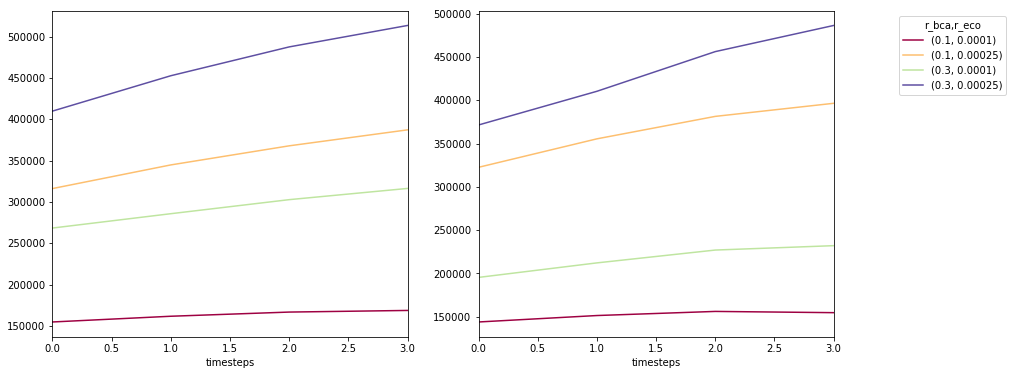

In [46]:
dt = dt.stack('observables')

key=[False, 'total_income']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

fig = plt.figure()
ax1 = fig.add_subplot(121)
key[0] = False
dt.xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
ax2 = fig.add_subplot(122)
key[0] = True
ln = dt.xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls)
lg = ln.get_legend()
bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
xOffset = .5
bb.x0 += xOffset
bb.x1 += xOffset
lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)